In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import get_data
import matplotlib.pyplot as plt
import population_activity as pop
import helper_functions as hf
import analysis
import plots
import statistics_test as st
import simulate_network_downstream as sim_net
import decoding2 as decoding2


from IPython.display import display, HTML
def print_large(text):
    display(HTML(f"<span style='font-size: 20px;'>{text}</span>"))

c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
# maps = [str(i) for i in np.arange(1, 13)] + ['14', '15', '17', '19']
# days1 = [str(i) for i in np.arange(0, 13)] + ['14', '15', '17', '19']
# datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 
#             'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 
#             'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']

# def run_analysis(datapath, context='Context1', sessions=maps, ref_session='0', days=days1):
#     res_align = analysis.loop_sessions_2datas(
#         analysis.AK_align_2_sets2, 
#         datapath, 
#         ref_session, 
#         sessions, 
#         context, 
#         False,  # cross
#         'dpca', 
#         6
#     )
    
#     translation_scale = [r[8] for r in res_align]
#     ref = [r[0][r[2]] for r in res_align]
#     align_population = [r[1][r[2]] for r in res_align]
#     align_population.insert(0, ref[0])

#     rotated_data2 = [r[4] for r in res_align]
#     pos_data2 = [r[5] for r in res_align]
#     data1 = res_align[0][6]
#     pos_data1 = res_align[0][7]
    
#     scores_test, scores_new_list, *_ = decoding2.decode_neural_activity(
#         data1, pos_data1, rotated_data2, pos_data2,
#         use_shuffled=False, shuffle_seed=0, model_type='gnb'
#     )
    
#     scores_test_shuff, scores_new_list_shuff, *_ = decoding2.decode_neural_activity(
#         data1, pos_data1, rotated_data2, pos_data2,
#         use_shuffled=True, shuffle_seed=0, model_type='gnb'
#     )
    
#     return {
#         'days': days,
#         'inverse_R': translation_scale['inverse_R'],
#     }

# results = {}
# for datapath in datapaths:
#     file_name = datapath.split('/')[-1].split('.')[0]
#     results[file_name] = run_analysis(datapath)

In [2]:
datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5',
                  'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']
day = '0'
context = 'Context1'
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
results = [sim_net.simulate_shear(datapath, '0', 'Context1', noise_levels = noise_levels, shear_factors= [0.8, 0.9, 1]) for datapath in datapaths]



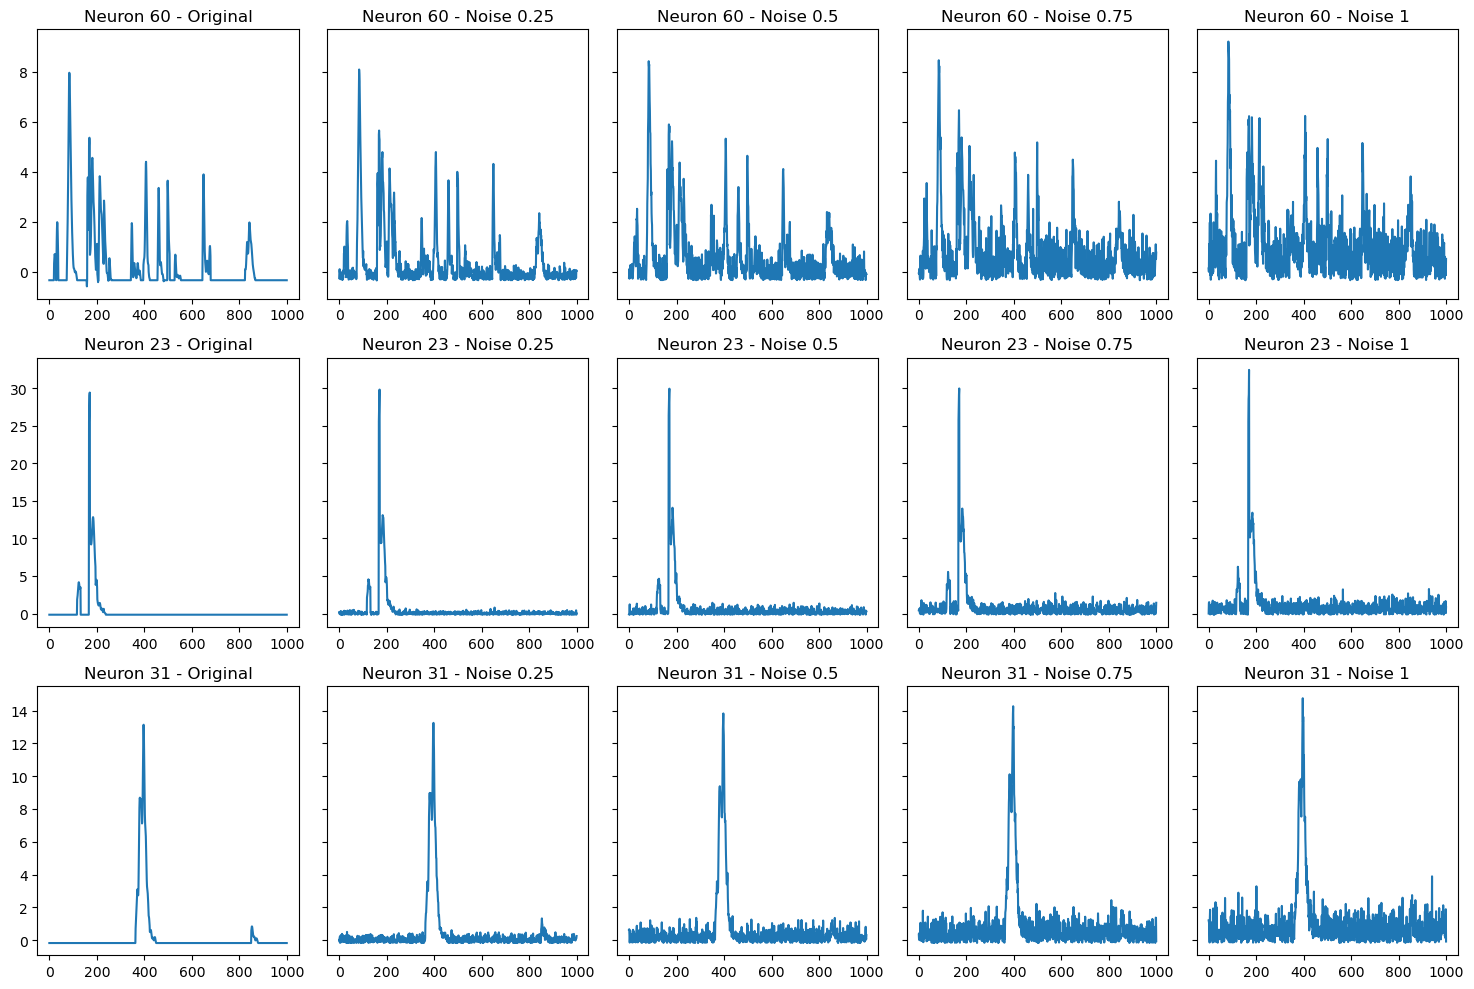

In [3]:
data = analysis.trial_one_session_AK('D:/Antje_CA1/data_sig/63.h5', '0', 'Context1', standardize='stand_m', remove_day_inactive=True)
X = data['calcium']
X_025 = X + np.absolute(np.random.normal(0, 0.25, X.shape))
X_05 = X + np.absolute(np.random.normal(0, 0.5, X.shape))
X_075 = X + np.absolute(np.random.normal(0, 0.75, X.shape))
X_1 = X + np.absolute(np.random.normal(0, 1, X.shape))

fig, ax = plt.subplots(3, 5, figsize=(15, 10), sharey='row')
neurons = [60, 23, 31]

for i, neuron in enumerate(neurons):
    ax[i, 0].plot(X[neuron][0:1000])
    ax[i, 0].set_title(f'Neuron {neuron} - Original')
    ax[i, 1].plot(X_025[neuron][0:1000])
    ax[i, 1].set_title(f'Neuron {neuron} - Noise 0.25')
    ax[i, 2].plot(X_05[neuron][0:1000])
    ax[i, 2].set_title(f'Neuron {neuron} - Noise 0.5')
    ax[i, 3].plot(X_075[neuron][0:1000])
    ax[i, 3].set_title(f'Neuron {neuron} - Noise 0.75')
    ax[i, 4].plot(X_1[neuron][0:1000])
    ax[i, 4].set_title(f'Neuron {neuron} - Noise 1')

plt.tight_layout()
plt.show()

In [4]:
mae_values_original = []
mae_values_controlled_0_5 = []
mae_values_controlled_0_75 = []
mae_values_controlled_1 = []
mae_values_rotation = []

for res in results:
    mae_list_original = []
    mae_list_controlled_0_5 = []
    mae_list_controlled_0_75 = []
    mae_list_controlled_1 = []
    mae_list_rotation = []
    
    for key in noise_levels:
        mae_list_original.append(res['original']['final'][key]['mae'])
        mae_list_controlled_0_5.append(res['controlled_0.8']['final'][key]['mae'])
        mae_list_controlled_0_75.append(res['controlled_0.9']['final'][key]['mae'])
        mae_list_controlled_1.append(res['controlled_1']['final'][key]['mae'])
        mae_list_rotation.append(res['rotation']['final'][key]['mae'])
    
    mae_values_original.append(mae_list_original)
    mae_values_controlled_0_5.append(mae_list_controlled_0_5)
    mae_values_controlled_0_75.append(mae_list_controlled_0_75)
    mae_values_controlled_1.append(mae_list_controlled_1)
    mae_values_rotation.append(mae_list_rotation)

mae_array_original = np.array(mae_values_original)
mae_array_controlled_0_5 = np.array(mae_values_controlled_0_5)
mae_array_controlled_0_75 = np.array(mae_values_controlled_0_75)
mae_array_controlled_1 = np.array(mae_values_controlled_1)
mae_array_rotation = np.array(mae_values_rotation)

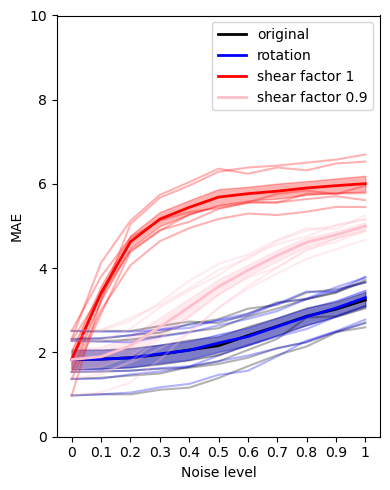

c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
c:\Users\Ole\Documents\script\remapping\remapping\statistics_test.py:247: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = np.mean(differences) / np.std(differences, ddof=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,32.076484,10,50,3.207648,147.265925,1.694857e-33,0.000011,0.466134,0.124110
1,condition,0.002705,1,5,0.002705,1.671036,2.526289e-01,0.252629,0.000074,1.000000
2,time * condition,0.023430,10,50,0.002343,0.909962,5.314244e-01,0.445112,0.000637,0.238879


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,NaN,nan,nan,,NaN,Cohen's d,1.8333,1.8333,0.0000,0.0000,6,True,1.0000
1,T2,C1,C2,t-test,0.2942,0.7804,1.0000,,0.1201,Cohen's d,1.8422,1.8400,0.0022,0.0180,6,True,0.2462
2,T3,C1,C2,t-test,0.2411,0.8191,1.0000,,0.0984,Cohen's d,1.8759,1.8723,0.0036,0.0368,6,True,0.7897
3,T4,C1,C2,t-test,-0.6043,0.5720,1.0000,,-0.2467,Cohen's d,1.9518,1.9669,-0.0151,0.0611,6,True,0.4091
4,T5,C1,C2,t-test,0.2848,0.7872,1.0000,,0.1163,Cohen's d,2.0603,2.0509,0.0094,0.0807,6,True,0.4991
5,T6,C1,C2,t-test,-2.6094,0.0477,0.4771,,-1.0653,Cohen's d,2.1618,2.2252,-0.0634,0.0595,6,True,0.1476
6,T7,C1,C2,t-test,0.5510,0.6053,1.0000,,0.2250,Cohen's d,2.4015,2.3777,0.0238,0.1058,6,True,0.9603
7,T8,C1,C2,t-test,0.4305,0.6847,1.0000,,0.1758,Cohen's d,2.6213,2.6140,0.0073,0.0414,6,True,0.8810
8,T9,C1,C2,wilcoxon,6.0000,0.4375,1.0000,,0.3852,r,2.8604,2.8484,0.0120,0.1361,6,False,0.0392
9,T10,C1,C2,t-test,-0.9431,0.3889,1.0000,,-0.3850,Cohen's d,3.0277,3.0525,-0.0248,0.0645,6,True,0.7860


c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
c:\Users\Ole\Documents\script\remapping\remapping\statistics_test.py:247: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = np.mean(differences) / np.std(differences, ddof=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,85.034160,10,50,8.503416,216.220350,1.552878e-37,0.000004,0.729637,0.122284
1,condition,38.732006,1,5,38.732006,324.818167,9.660139e-06,0.000010,0.551416,1.000000
2,time * condition,15.293398,10,50,1.529340,122.361079,1.436065e-31,0.000001,0.326766,0.163735


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,NaN,nan,nan,,NaN,Cohen's d,1.8333,1.8333,0.0000,0.0000,6,True,1.0000
1,T2,C1,C2,t-test,-1.9147,0.1137,1.0000,,-0.7817,Cohen's d,1.8422,1.8990,-0.0568,0.0726,6,True,0.1846
2,T3,C1,C2,t-test,-11.2572,9.6632e-05,0.0010,***,-4.5957,Cohen's d,1.8759,2.1602,-0.2843,0.0619,6,True,0.3624
3,T4,C1,C2,t-test,-12.0355,6.9884e-05,0.0007,***,-4.9135,Cohen's d,1.9518,2.6033,-0.6515,0.1326,6,True,0.2885
4,T5,C1,C2,t-test,-12.4847,5.8481e-05,0.0006,***,-5.0969,Cohen's d,2.0603,3.0794,-1.0191,0.1999,6,True,0.7504
5,T6,C1,C2,t-test,-19.8320,6.0216e-06,6.0216e-05,***,-8.0964,Cohen's d,2.1618,3.5628,-1.4010,0.1730,6,True,0.0711
6,T7,C1,C2,t-test,-15.3398,2.1361e-05,0.0002,***,-6.2624,Cohen's d,2.4015,3.9503,-1.5487,0.2473,6,True,0.5514
7,T8,C1,C2,t-test,-18.0184,9.6716e-06,9.6716e-05,***,-7.3560,Cohen's d,2.6213,4.3011,-1.6798,0.2284,6,True,0.3062
8,T9,C1,C2,t-test,-13.7766,3.6173e-05,0.0004,***,-5.6243,Cohen's d,2.8604,4.6153,-1.7549,0.3120,6,True,0.1278
9,T10,C1,C2,t-test,-14.6151,2.7087e-05,0.0003,***,-5.9666,Cohen's d,3.0277,4.7923,-1.7646,0.2957,6,True,0.6647


c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
c:\Users\Ole\Documents\script\remapping\remapping\statistics_test.py:247: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = np.mean(differences) / np.std(differences, ddof=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,87.458791,10,50,8.745879,142.997158,3.437421e-33,0.000012,0.734978,0.124478
1,condition,241.582375,1,5,241.582375,111.751469,1.308906e-04,0.000131,0.884532,1.000000
2,time * condition,32.584353,10,50,3.258435,97.305041,3.302924e-29,0.000015,0.508172,0.138658


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,NaN,nan,nan,,NaN,Cohen's d,1.8333,1.8333,0.0000,0.0000,6,True,1.0000
1,T2,C1,C2,t-test,-9.6387,0.0002,0.0020,**,-3.9350,Cohen's d,1.8422,3.4140,-1.5718,0.3994,6,True,0.7173
2,T3,C1,C2,t-test,-9.5913,0.0002,0.0021,**,-3.9156,Cohen's d,1.8759,4.6280,-2.7521,0.7029,6,True,0.2237
3,T4,C1,C2,t-test,-10.4029,0.0001,0.0014,**,-4.2470,Cohen's d,1.9518,5.1648,-3.2130,0.7565,6,True,0.2586
4,T5,C1,C2,t-test,-10.2581,0.0002,0.0015,**,-4.1878,Cohen's d,2.0603,5.4444,-3.3841,0.8081,6,True,0.2915
5,T6,C1,C2,t-test,-11.0951,0.0001,0.0010,**,-4.5296,Cohen's d,2.1618,5.6884,-3.5266,0.7786,6,True,0.3242
6,T7,C1,C2,t-test,-10.9673,0.0001,0.0011,**,-4.4774,Cohen's d,2.4015,5.7701,-3.3686,0.7524,6,True,0.2698
7,T8,C1,C2,t-test,-10.8899,0.0001,0.0011,**,-4.4458,Cohen's d,2.6213,5.8298,-3.2085,0.7217,6,True,0.3347
8,T9,C1,C2,t-test,-10.6716,0.0001,0.0013,**,-4.3567,Cohen's d,2.8604,5.9046,-3.0442,0.6987,6,True,0.1236
9,T10,C1,C2,t-test,-10.9488,0.0001,0.0011,**,-4.4698,Cohen's d,3.0277,5.9602,-2.9325,0.6561,6,True,0.1624


In [5]:
fig, ax = plt.subplots(figsize=(4, 5))
plots.plot_anova([mae_array_original, mae_array_rotation, mae_array_controlled_1, mae_array_controlled_0_75], noise_levels, colors=['k', 'b', 'r', 'pink'], 
                          labels=['original', 'rotation', 'shear factor 1', 'shear factor 0.9'], 
                          plot_individual=True, ylim=[0, 10], ax=ax, xlabel='Noise level', ylabel='MAE')
plt.show()  

print_large('\nTWO-WAY REPEATED ANOVA Rotation')
anova=st.repeated_measures_anova_general([mae_array_original,mae_array_rotation])
display(anova[0])
display(anova[1])

print_large('\nTWO-WAY REPEATED ANOVA shear factor 0.9')
anova=st.repeated_measures_anova_general([mae_array_original,mae_array_controlled_0_75])
display(anova[0])
display(anova[1])

print_large('\nTWO-WAY REPEATED ANOVA shear factor 1')
anova=st.repeated_measures_anova_general([mae_array_original,mae_array_controlled_1])
display(anova[0])
display(anova[1])

In [6]:
drift_values_original = []
drift_values_controlled_0_5 = []
drift_values_controlled_0_75 = []
drift_values_controlled_1 = []
drift_values_rotation = []

for res in results:
    drift_list_original = []
    drift_list_controlled_0_5 = []
    drift_list_controlled_0_75 = []
    drift_list_controlled_1 = []
    drift_list_rotation = []

    for key in noise_levels:
        drift_list_original.append(res['original']['individual'][key]['drift_downstream'])
        drift_list_controlled_0_5.append(res['controlled_0.8']['individual'][key]['drift_downstream'])
        drift_list_controlled_0_75.append(res['controlled_0.9']['individual'][key]['drift_downstream'])
        drift_list_controlled_1.append(res['controlled_1']['individual'][key]['drift_downstream'])
        drift_list_rotation.append(res['rotation']['individual'][key]['drift_downstream'])
    
    drift_values_original.append(drift_list_original)
    drift_values_controlled_0_5.append(drift_list_controlled_0_5)
    drift_values_controlled_0_75.append(drift_list_controlled_0_75)
    drift_values_controlled_1.append(drift_list_controlled_1)
    drift_values_rotation.append(drift_list_rotation)

drift_array_original = np.array(drift_values_original)
drift_array_controlled_0_5 = np.array(drift_values_controlled_0_5)
drift_array_controlled_0_75 = np.array(drift_values_controlled_0_75)
drift_array_controlled_1 = np.array(drift_values_controlled_1)
drift_array_rotation = np.array(drift_values_rotation)

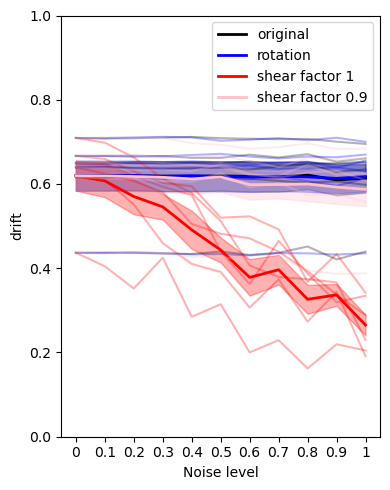

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,0.000691,10,50,0.000069,3.494829,0.001507,0.053756,0.000698,0.252385
1,condition,0.000009,1,5,0.000009,0.785715,0.415991,0.415991,0.000009,1.000000
2,time * condition,0.000164,10,50,0.000016,0.963404,0.486171,0.410256,0.000166,0.185971


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,0.9325,0.3939,1.0000,,0.3807,Cohen's d,0.6196,0.6196,0.0000,0.0000,6,True,0.9181
1,T2,C1,C2,t-test,0.1980,0.8509,1.0000,,0.0808,Cohen's d,0.6194,0.6193,0.0001,0.0008,6,True,0.2918
2,T3,C1,C2,t-test,-3.7665,0.0131,0.1438,,-1.5377,Cohen's d,0.6189,0.6203,-0.0014,0.0009,6,True,0.8617
3,T4,C1,C2,t-test,-0.0141,0.9893,1.0000,,-0.0058,Cohen's d,0.6185,0.6185,-0.0000,0.0021,6,True,0.7235
4,T5,C1,C2,t-test,-1.2580,0.2639,1.0000,,-0.5136,Cohen's d,0.6180,0.6198,-0.0018,0.0035,6,True,0.0951
5,T6,C1,C2,t-test,0.4955,0.6413,1.0000,,0.2023,Cohen's d,0.6192,0.6180,0.0012,0.0059,6,True,0.1299
6,T7,C1,C2,t-test,0.4792,0.6520,1.0000,,0.1956,Cohen's d,0.6181,0.6170,0.0011,0.0056,6,True,0.1241
7,T8,C1,C2,t-test,-0.7223,0.5025,1.0000,,-0.2949,Cohen's d,0.6166,0.6184,-0.0017,0.0059,6,True,0.9265
8,T9,C1,C2,t-test,1.3235,0.2430,1.0000,,0.5403,Cohen's d,0.6211,0.6168,0.0043,0.0080,6,True,0.8009
9,T10,C1,C2,wilcoxon,6.0000,0.4375,1.0000,,0.3852,r,0.6097,0.6133,-0.0035,0.0110,6,False,0.0051


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,0.006073,10,50,0.000607,10.182004,4.529718e-09,0.005757,0.005919,0.178040
1,condition,0.003589,1,5,0.003589,28.291500,3.142803e-03,0.003143,0.003506,1.000000
2,time * condition,0.002955,10,50,0.000295,5.365393,2.401715e-05,0.020025,0.002888,0.228383


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,2.7116,0.0422,0.4641,,1.1070,Cohen's d,0.6196,0.6196,0.0000,0.0000,6,True,0.2117
1,T2,C1,C2,t-test,0.3829,0.7175,1.0000,,0.1563,Cohen's d,0.6194,0.6190,0.0004,0.0023,6,True,0.1525
2,T3,C1,C2,t-test,0.7634,0.4797,1.0000,,0.3117,Cohen's d,0.6189,0.6177,0.0012,0.0040,6,True,0.4257
3,T4,C1,C2,t-test,1.8715,0.1202,1.0000,,0.7640,Cohen's d,0.6185,0.6158,0.0028,0.0036,6,True,0.2125
4,T5,C1,C2,t-test,2.4060,0.0612,0.6728,,0.9823,Cohen's d,0.6180,0.6121,0.0059,0.0060,6,True,0.3861
5,T6,C1,C2,t-test,0.5606,0.5993,1.0000,,0.2289,Cohen's d,0.6192,0.6167,0.0025,0.0108,6,True,0.2096
6,T7,C1,C2,t-test,6.1803,0.0016,0.0178,*,2.5231,Cohen's d,0.6181,0.5985,0.0196,0.0078,6,True,0.8674
7,T8,C1,C2,t-test,4.9850,0.0042,0.0457,*,2.0351,Cohen's d,0.6166,0.5986,0.0180,0.0088,6,True,0.3213
8,T9,C1,C2,t-test,2.6031,0.0481,0.5287,,1.0627,Cohen's d,0.6211,0.6000,0.0211,0.0199,6,True,0.2460
9,T10,C1,C2,t-test,2.4457,0.0582,0.6407,,0.9984,Cohen's d,0.6097,0.5926,0.0171,0.0172,6,True,0.1925


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,0.460437,10,50,0.046044,52.413087,5.281648e-23,1.101646e-08,0.316941,0.323376
1,condition,0.895851,1,5,0.895851,182.966239,3.956173e-05,3.956173e-05,0.474455,1.000000
2,time * condition,0.435090,10,50,0.043509,53.560299,3.243887e-23,1.635787e-09,0.304811,0.358527


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,2.3814,0.0631,0.6936,,0.9722,Cohen's d,0.6196,0.6196,0.0000,0.0000,6,True,0.0810
1,T2,C1,C2,t-test,2.6993,0.0428,0.4710,,1.1020,Cohen's d,0.6194,0.6074,0.0120,0.0109,6,True,0.2222
2,T3,C1,C2,t-test,5.4049,0.0029,0.0322,*,2.2065,Cohen's d,0.6189,0.5703,0.0486,0.0220,6,True,0.1779
3,T4,C1,C2,t-test,3.5909,0.0157,0.1726,,1.4660,Cohen's d,0.6185,0.5457,0.0728,0.0497,6,True,0.5974
4,T5,C1,C2,t-test,6.2593,0.0015,0.0168,*,2.5554,Cohen's d,0.6180,0.4912,0.1268,0.0496,6,True,0.6145
5,T6,C1,C2,t-test,10.7579,0.0001,0.0013,**,4.3919,Cohen's d,0.6192,0.4432,0.1760,0.0401,6,True,0.6053
6,T7,C1,C2,t-test,8.2441,0.0004,0.0047,**,3.3656,Cohen's d,0.6181,0.3783,0.2398,0.0713,6,True,0.1451
7,T8,C1,C2,t-test,9.4782,0.0002,0.0024,**,3.8694,Cohen's d,0.6166,0.3964,0.2202,0.0569,6,True,0.1191
8,T9,C1,C2,t-test,21.4277,4.1053e-06,4.5158e-05,***,8.7478,Cohen's d,0.6211,0.3262,0.2948,0.0337,6,True,0.4321
9,T10,C1,C2,t-test,12.0479,6.9536e-05,0.0008,***,4.9185,Cohen's d,0.6097,0.3367,0.2730,0.0555,6,True,0.4762


In [7]:
fig, ax = plt.subplots(figsize=(4, 5))
plots.plot_anova([drift_array_original, drift_array_rotation, drift_array_controlled_1, drift_array_controlled_0_75], noise_levels, colors=['k', 'b', 'r', 'pink'], 
                          labels=['original', 'rotation', 'shear factor 1', 'shear factor 0.9'], 
                          plot_individual=True, ylim=[0, 1], ax=ax, xlabel='Noise level', ylabel='drift')
plt.show()  

print_large('\nTWO-WAY REPEATED ANOVA Rotation')
anova=st.repeated_measures_anova_general([drift_array_original,drift_array_rotation])
display(anova[0])
display(anova[1])

print_large('\nTWO-WAY REPEATED ANOVA shear factor 0.9')
anova=st.repeated_measures_anova_general([drift_array_original,drift_array_controlled_0_75])
display(anova[0])
display(anova[1])

print_large('\nTWO-WAY REPEATED ANOVA shear factor 1')
anova=st.repeated_measures_anova_general([drift_array_original,drift_array_controlled_1])
display(anova[0])
display(anova[1])

In [10]:
results_list = []
for datapath in datapaths:
    res = sim_net.simulate_random_transform(datapath, day='0', context='Context1',  noise=1, n_transforms=50)
    results_list.append(res)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y_std    
No. Observations: 300     Method:             REML     
No. Groups:       6       Scale:              0.2568   
Min. group size:  50      Log-Likelihood:     -232.4914
Max. group size:  50      Converged:          Yes      
Mean group size:  50.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -0.000    0.108 -0.000 1.000 -0.211  0.211
x1_std        0.828    0.029 28.280 0.000  0.771  0.886
Group Var     0.065    0.088                           

Intercept     1.000000e+00
x1_std       6.059610e-176
Group Var     1.463711e-01
dtype: float64


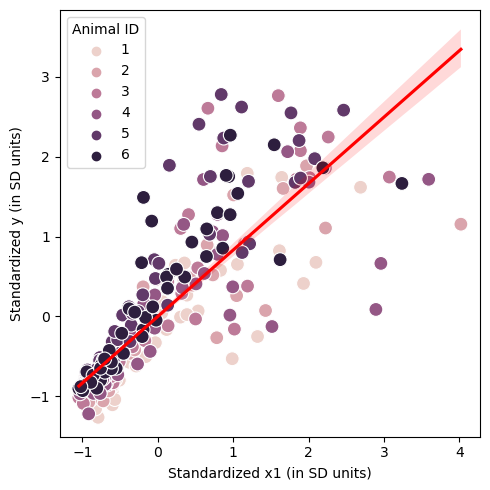

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y_std    
No. Observations: 300     Method:             REML     
No. Groups:       6       Scale:              0.2824   
Min. group size:  50      Log-Likelihood:     -247.5278
Max. group size:  50      Converged:          Yes      
Mean group size:  50.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -0.000    0.135 -0.000 1.000 -0.264  0.264
x1_std        0.816    0.031 26.426 0.000  0.756  0.877
Group Var     0.103    0.131                           

Intercept     1.000000e+00
x1_std       6.953185e-154
Group Var     1.372778e-01
dtype: float64


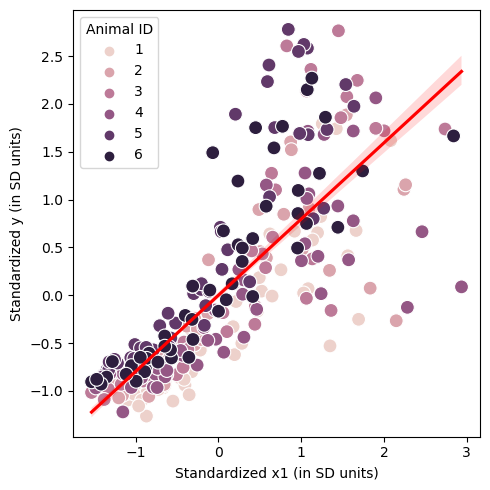

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y_std    
No. Observations: 300     Method:             REML     
No. Groups:       6       Scale:              0.2552   
Min. group size:  50      Log-Likelihood:     -232.7963
Max. group size:  50      Converged:          Yes      
Mean group size:  50.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.000    0.137  0.000 1.000 -0.268  0.268
x1_std        0.833    0.029 28.351 0.000  0.775  0.890
Group Var     0.107    0.141                           

Intercept     1.000000e+00
x1_std       8.187717e-177
Group Var     1.346732e-01
dtype: float64


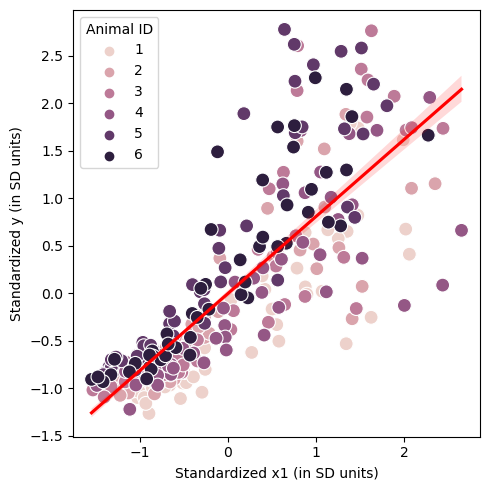

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y_std    
No. Observations: 300     Method:             REML     
No. Groups:       6       Scale:              0.1740   
Min. group size:  50      Log-Likelihood:     -173.1866
Max. group size:  50      Converged:          Yes      
Mean group size:  50.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -0.000    0.069 -0.000 1.000 -0.135  0.135
x1_std        0.886    0.024 36.402 0.000  0.838  0.934
Group Var     0.025    0.043                           

Intercept     1.000000e+00
x1_std       3.896871e-290
Group Var     1.694208e-01
dtype: float64


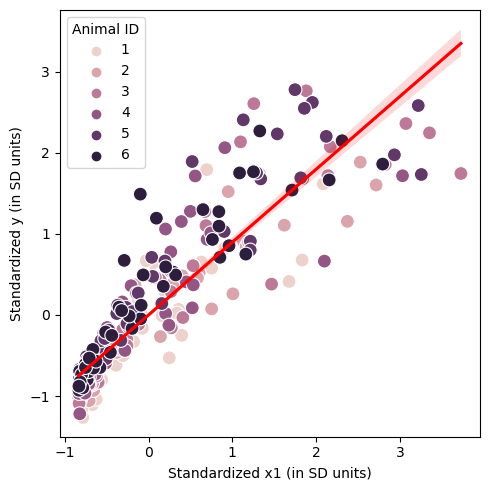

c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to con

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y_std    
No. Observations: 300     Method:             REML     
No. Groups:       6       Scale:              0.9502   
Min. group size:  50      Log-Likelihood:     -424.9097
Max. group size:  50      Converged:          No       
Mean group size:  50.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.000    0.125  0.000 1.000 -0.245  0.245
x1_std       -0.065    0.057 -1.147 0.251 -0.177  0.046
Group Var     0.075    0.080                           

Intercept    1.000000
x1_std       0.251352
Group Var    0.338134
dtype: float64


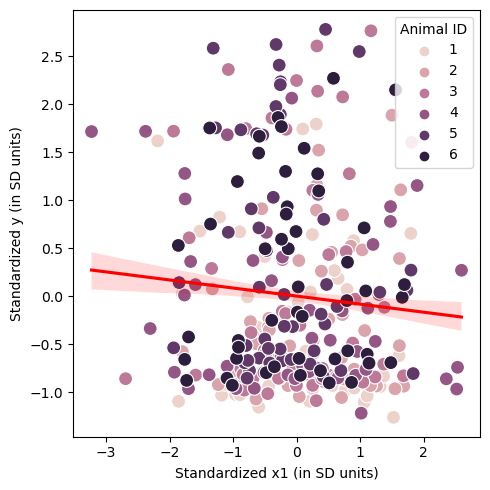

In [11]:
y = [np.array(res['mae']) - np.array(res['original_mae'])  for res in results_list]
x1 = [np.array(res['orthogonality']) for res in results_list]

data_dict = {
    'x1': x1,
    'y': y,
}
    
results_ml, data, prefix = st.fit_mixed_model(data_dict, standardize=True)
print_large('orthogonality vs MAE')
print(results_ml.summary())
print(results_ml.pvalues)

fig_scatter = plots.plot_scatter(data, prefix)
plt.figure(fig_scatter.number)
plt.show()



y = [np.array(res['mae']) - np.array(res['original_mae'])  for res in results_list]
x1 = [np.array(res['angle']) for res in results_list]

data_dict = {
    'x1': x1,
    'y': y,
}
    
results_ml, data, prefix = st.fit_mixed_model(data_dict, standardize=True)
print_large('edge angles vs MAE')
print(results_ml.summary())
print(results_ml.pvalues)

fig_scatter = plots.plot_scatter(data, prefix)
plt.figure(fig_scatter.number)
plt.show()



y = [np.array(res['mae']) - np.array(res['original_mae'])  for res in results_list]
x1 = [np.array(res['subspace']) for res in results_list]

data_dict = {
    'x1': x1,
    'y': y,
}
    
results_ml, data, prefix = st.fit_mixed_model(data_dict, standardize=True)
print_large('subspace vs MAE')
print(results_ml.summary())
print(results_ml.pvalues)

fig_scatter = plots.plot_scatter(data, prefix)
plt.figure(fig_scatter.number)
plt.show()


y = [np.array(res['mae']) - np.array(res['original_mae'])  for res in results_list]
x1 = [np.array(res['topology']) for res in results_list]

data_dict = {
    'x1': x1,
    'y': y,
}
    
results_ml, data, prefix = st.fit_mixed_model(data_dict, standardize=True)
print_large('homology vs MAE')
print(results_ml.summary())
print(results_ml.pvalues)

fig_scatter = plots.plot_scatter(data, prefix)
plt.figure(fig_scatter.number)
plt.show()


y = [np.array(res['mae']) - np.array(res['original_mae'])  for res in results_list]
x1 = [np.array(res['drift']) for res in results_list]

data_dict = {
    'x1': x1,
    'y': y,
}
    
results_ml, data, prefix = st.fit_mixed_model(data_dict, standardize=True)
print_large('drifting vs MAE')
print(results_ml.summary())
print(results_ml.pvalues)

fig_scatter = plots.plot_scatter(data, prefix)
plt.figure(fig_scatter.number)
plt.show()
